In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip


--2024-11-25 10:28:44--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.200.145, 3.5.30.100, 16.15.185.195, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.200.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 777.80M  17.4MB/s    in 48s     

2024-11-25 10:29:32 (16.2 MB/s) - ‘coco_val2017.zip’ saved [815585330/815585330]

--2024-11-25 10:29:32--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.253, 3.5.30.95, 52.217.205.97, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[=====

In [ ]:
from zipfile import ZipFile, BadZipFile
import os

def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)

        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)

    except BadZipFile as e:
        print("Error:", e)


extract_ANN_path = "/content/coco_ann2017"
extract_VAL_path = "/content/coco_val2017"


extract_zip_file(extract_VAL_path)
extract_zip_file(extract_ANN_path)


In [ ]:
import torch
import torchvision
import torchaudio
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 123MB/s]


In [ ]:
torch.save(model.state_dict(), "fasterrcnn.pt")

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torch

# Initialize the model
model = fasterrcnn_resnet50_fpn(pretrained=False)  # Set pretrained=False because we're loading custom weights

# Load the saved weights
model.load_state_dict(torch.load("fasterrcnn.pt"))

# Set the model to evaluation mode
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 158MB/s]
<ipython-input-8-668f1c794488>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
num_classes = model.roi_heads.box_predictor.cls_score.out_features
print("Number of classes:", num_classes)

Number of classes: 91


In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

Results for person2.jpeg:
Coordinates: (11, 0), (221, 205) - Label: person


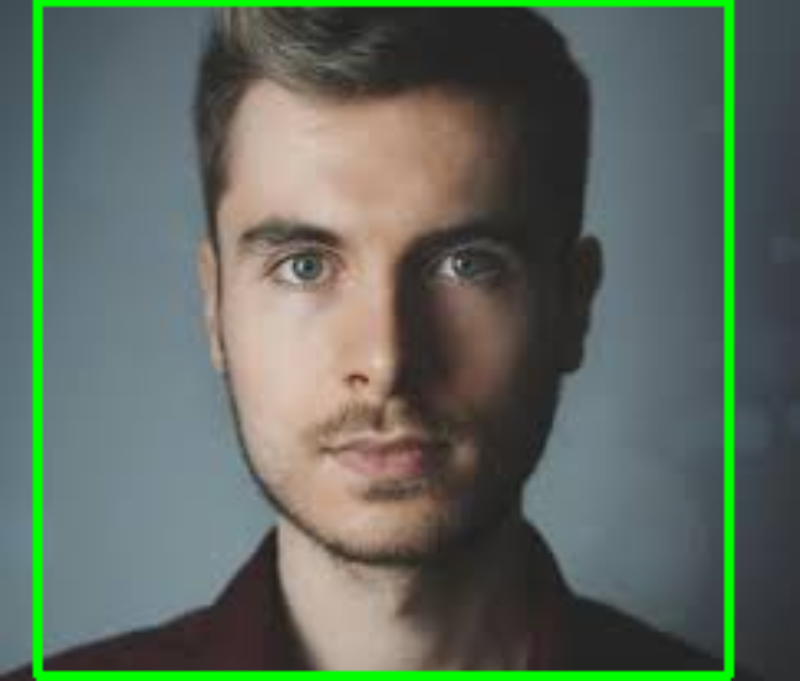

Detection Dictionary: {'boxes': [[11, 0, 221, 205]], 'labels': ['person'], 'scores': [0.9968947172164917]}
Time taken: 0 seconds and 139 milliseconds

Results for person1.jpg:
Coordinates: (72, 18), (366, 347) - Label: person


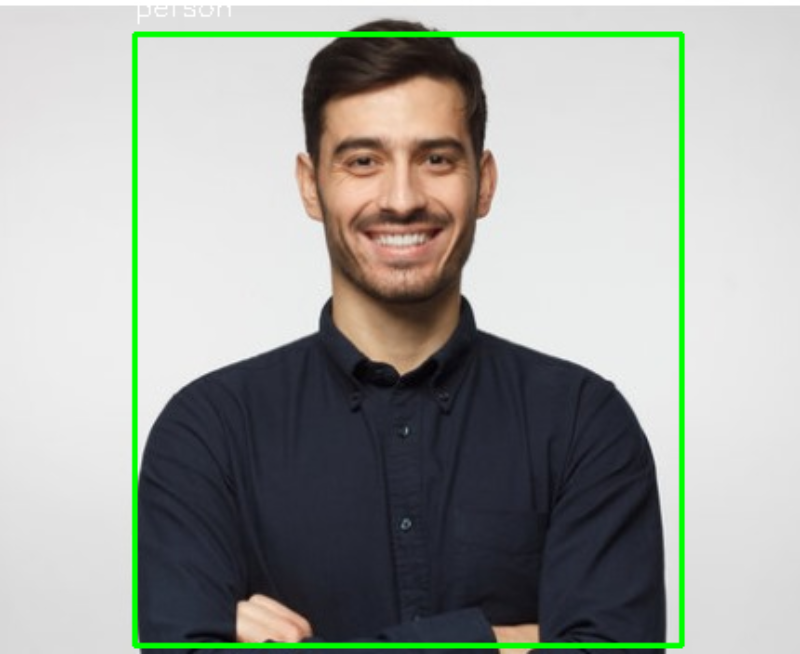

Detection Dictionary: {'boxes': [[72, 18, 366, 347]], 'labels': ['person'], 'scores': [0.9997736811637878]}
Time taken: 0 seconds and 97 milliseconds



In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import cv2
import os
from google.colab.patches import cv2_imshow
import time

# Load the pre-trained Faster R-CNN model from torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the image transformation
transform = T.ToTensor()

# Specify the path to your folder containing images
image_folder = '/content/dataset_1'

# COCO class labels
coco_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra",
    "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
    "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange",
    "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "TV", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink",
    "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
    "toothbrush"
]

# Iterate over each image in the folder
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Load and transform the image
        img_path = os.path.join(image_folder, image_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

        # Measure the start time
        start_time = time.time()

        # Perform object detection
        with torch.no_grad():
            pred = model(img_tensor)

        # Measure the end time and calculate the elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time
        elapsed_seconds = int(elapsed_time)
        elapsed_milliseconds = int((elapsed_time - elapsed_seconds) * 1000)

        # Extract the bounding boxes, labels, and scores
        bboxes = pred[0]['boxes'].cpu()
        labels = pred[0]['labels'].cpu()
        scores = pred[0]['scores'].cpu()

        # Apply Non-Maximum Suppression (NMS)
        keep_indices = torchvision.ops.nms(bboxes, scores, iou_threshold=0.5)  # IoU threshold for NMS
        bboxes = bboxes[keep_indices]
        labels = labels[keep_indices]
        scores = scores[keep_indices]

        # Initialize the dictionary for model detection
        detection_dict = {
            "boxes": [],
            "labels": [],
            "scores": []
        }

        # Read the image with OpenCV for drawing
        img_cv2 = cv2.imread(img_path)
        font = cv2.FONT_HERSHEY_SIMPLEX

        # Loop through each detected object
        num_objects = len(bboxes)
        print(f"Results for {image_name}:")
        for i in range(num_objects):
            # Filter out low-confidence detections
            if scores[i] > 0.7:  # Adjust threshold to 0.7
                x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
                label_index = labels[i].item() - 1  # Get the label index

                # Check if the label index is within the valid range
                if 0 <= label_index < len(coco_names):
                    class_name = coco_names[label_index]  # Get the class name

                    # Optional: Filter specific classes (uncomment if needed)
                    # if class_name not in ["person", "car"]:  # Add expected labels
                    #     continue

                    print(f"Coordinates: ({x1}, {y1}), ({x2}, {y2}) - Label: {class_name}")

                    # Append to the detection dictionary
                    detection_dict["boxes"].append([x1, y1, x2, y2])
                    detection_dict["labels"].append(class_name)
                    detection_dict["scores"].append(scores[i].item())

                    # Draw bounding box and label on the image
                    img_cv2 = cv2.rectangle(img_cv2, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    img_cv2 = cv2.putText(img_cv2, class_name, (x1, y1 - 10), font, 0.5, (255, 255, 255), 1)

        # Resize the image for larger display
        display_width = 800  # Desired display width
        display_height = int(img_cv2.shape[0] * (display_width / img_cv2.shape[1]))  # Maintain aspect ratio
        img_cv2_resized = cv2.resize(img_cv2, (display_width, display_height))

        # Display the resized image with bounding boxes
        cv2_imshow(img_cv2_resized)

        # Print the detection dictionary and time taken
        print("Detection Dictionary:", detection_dict)
        print(f"Time taken: {elapsed_seconds} seconds and {elapsed_milliseconds} milliseconds\n")



image 1/1 /content/traffic1.jpg: 448x640 3 persons, 16 cars, 2 trucks, 1 traffic light, 21.0ms
Speed: 3.5ms preprocess, 21.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


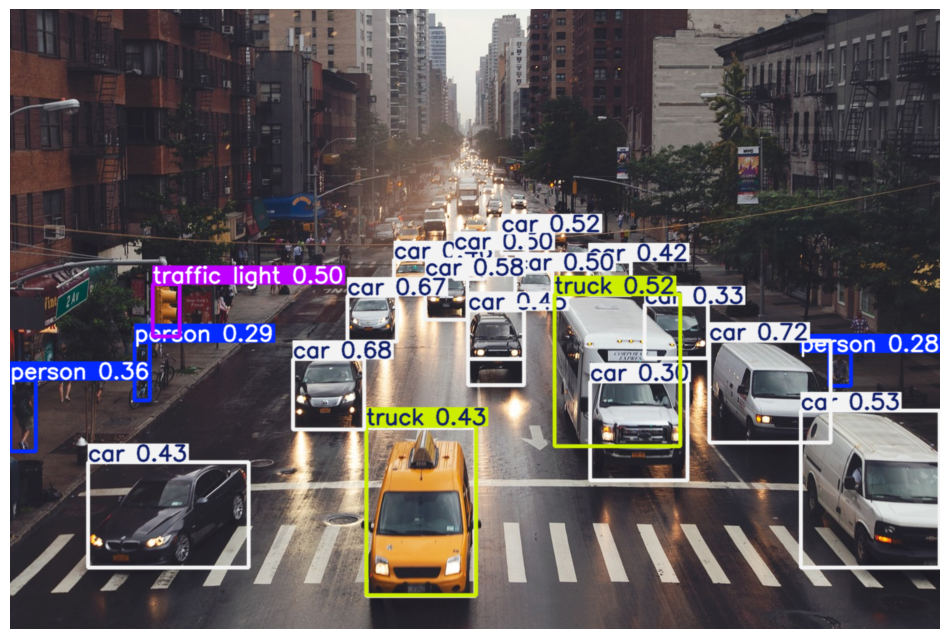

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Load the YOLO model
model = YOLO("/content/yolo11n.pt")  # Provide the path to your .pt file

# Perform inference (example with an image)
results = model("/content/traffic1.jpg")  # Replace with your image path

# Plot the annotated image
annotated_image = results[0].plot()

# Resize the image to make it larger
large_size = (annotated_image.shape[1] * 2, annotated_image.shape[0] * 2)  # Double the width and height
annotated_image_resized = cv2.resize(annotated_image, large_size)

# Plot the resized image
plt.figure(figsize=(12, 12))  # Set the figure size to make the plot larger
plt.imshow(cv2.cvtColor(annotated_image_resized, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
plt.axis("off")  # Turn off axis labels
plt.show()


In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import cv2
import os
from google.colab.patches import cv2_imshow

# Load the pre-trained Faster R-CNN model from torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the image transformation
transform = T.ToTensor()

# Specify the path to your folder containing images
image_folder = '/content/dataset'

# COCO class labels
coco_names = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
    "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
    "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
    "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot",
    "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
    "toilet", "TV", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
    "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
    "toothbrush"
]


# Final dictionary to store results for all images
model_detection = {}

# Iterate over each image in the folder
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Load and transform the image
        img_path = os.path.join(image_folder, image_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

        # Perform object detection
        with torch.no_grad():
            pred = model(img_tensor)

        # Extract the bounding boxes, labels, and scores
        bboxes = pred[0]['boxes'].cpu()
        labels = pred[0]['labels'].cpu()
        scores = pred[0]['scores'].cpu()

        # Initialize a list to store detections for the current image
        detections = []

        # Loop through each detected object
        for i in range(len(bboxes)):
            # Filter out low-confidence detections (optional)
            if scores[i] > 0.5:  # Adjust threshold as needed
                x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
                label_index = labels[i].item()

                # Check if the label index is within the valid range
                if 0 <= label_index < len(coco_names):
                    class_name = coco_names[label_index]  # Get the class name

                    # Append detection to the list
                    detections.append({
                        'bbox': [x1, y1, x2, y2],
                        'label': class_name
                    })

        # Store the detections for the current image in the final dictionary
        model_detection[image_name] = detections

# Now, `model_detection` contains the results for all images
print("Final Model Detection Dictionary:")
print(model_detection)


Final Model Detection Dictionary:
{'WhatsApp Image 2024-11-05 at 12.54.39_5c6db5ad.jpg': [{'bbox': [2, 0, 1108, 1134], 'label': 'mouse'}], 'IMG-20241105-WA0015.jpg': [{'bbox': [92, 821, 573, 1331], 'label': 'scissors'}, {'bbox': [90, 864, 508, 1317], 'label': 'toilet'}, {'bbox': [7, 64, 827, 1391], 'label': 'person'}], 'IMG-20241105-WA0016.jpg': [{'bbox': [10, 383, 447, 1268], 'label': 'person'}, {'bbox': [252, 51, 391, 695], 'label': 'orange'}, {'bbox': [0, 411, 411, 839], 'label': 'person'}], 'WhatsApp Image 2024-11-05 at 13.23.35_0e89bfd2.jpg': [{'bbox': [842, 78, 1440, 931], 'label': 'banana'}, {'bbox': [92, 79, 907, 945], 'label': 'banana'}], 'IMG-20241019-WA0001.jpg': [{'bbox': [54, 79, 652, 1017], 'label': 'cat'}, {'bbox': [165, 86, 622, 694], 'label': 'cat'}], 'IMG-20241105-WA0019.jpg': [{'bbox': [124, 891, 1412, 1588], 'label': 'sink'}], 'IMG-20241105-WA0018.jpg': [{'bbox': [23, 121, 804, 1244], 'label': 'person'}, {'bbox': [397, 95, 785, 753], 'label': 'person'}, {'bbox': [27

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
import json
import os
from PIL import Image
from torchvision.ops import box_iou

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
model.eval()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the image transformation
transform = T.ToTensor()

# Path to val2017 images and annotations
image_folder = '/content/coco_val2017/val2017'  # Update this path if needed
annotation_path = '/content/coco_ann2017/annotations/instances_val2017.json'  # Update this path if needed

# Load COCO annotations
with open(annotation_path, 'r') as f:
    coco_annotations = json.load(f)

# Create a mapping of image_id to ground truth annotations
image_id_to_annotations = {}
for annotation in coco_annotations['annotations']:
    image_id = annotation['image_id']
    bbox = annotation['bbox']  # Ground truth bounding box in [x, y, width, height]
    category_id = annotation['category_id']  # Object class
    if image_id not in image_id_to_annotations:
        image_id_to_annotations[image_id] = []
    image_id_to_annotations[image_id].append({'bbox': bbox, 'category_id': category_id})

# Create a mapping of file names to image IDs
file_name_to_image_id = {img['file_name']: img['id'] for img in coco_annotations['images']}

# Initialize metrics
true_positives = 0
false_positives = 0
false_negatives = 0
iou_threshold = 0.5  # Adjust this IoU threshold if needed

# Iterate over images in val2017
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Load and transform the image
        img_path = os.path.join(image_folder, image_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            pred = model(img_tensor)

        # Extract predictions
        pred_boxes = pred[0]['boxes'].cpu()  # [x1, y1, x2, y2]
        pred_labels = pred[0]['labels'].cpu()
        pred_scores = pred[0]['scores'].cpu()

        # Get the ground truth annotations for this image
        image_id = file_name_to_image_id[image_name]
        ground_truths = image_id_to_annotations.get(image_id, [])

        # Convert ground truth bounding boxes from [x, y, width, height] to [x1, y1, x2, y2]
        ground_truth_boxes = []
        for gt in ground_truths:
            x, y, w, h = gt['bbox']
            x1, y1, x2, y2 = x, y, x + w, y + h
            ground_truth_boxes.append([x1, y1, x2, y2])
        ground_truth_boxes = torch.tensor(ground_truth_boxes, dtype=torch.float32)

        # Skip IoU calculation if there are no ground truth boxes
        if ground_truth_boxes.size(0) == 0:
            false_positives += len(pred_boxes)  # All predictions are false positives
            continue

        # Match predictions to ground truths
        gt_matched = [False] * len(ground_truth_boxes)  # Track matched ground truths
        for i, pred_box in enumerate(pred_boxes):
            if pred_scores[i] > 0.5:  # Confidence threshold
                pred_tensor = pred_box.unsqueeze(0)  # Convert to 2D tensor for box_iou
                ious = box_iou(pred_tensor, ground_truth_boxes)  # Calculate IoUs
                max_iou, max_iou_idx = torch.max(ious, dim=1)  # Get the best match
                if max_iou.item() >= iou_threshold:  # If IoU >= threshold, it's a match
                    if not gt_matched[max_iou_idx.item()]:  # True Positive if not matched before
                        true_positives += 1
                        gt_matched[max_iou_idx.item()] = True
                    else:
                        false_positives += 1  # Duplicate match
                else:
                    false_positives += 1  # IoU < threshold

        # Count remaining unmatched ground truths as False Negatives
        false_negatives += gt_matched.count(False)

# Calculate metrics
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print("Evaluation Results:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")


Evaluation Results:
Precision: 0.5455
Recall: 0.6742
F1-Score: 0.6031
True Positives: 24798, False Positives: 20662, False Negatives: 11983


Evaluation Results:
Precision: 0.5455
Recall: 0.6742
F1-Score: 0.6031
True Positives: 24798, False Positives: 20662, False Negatives: 11983


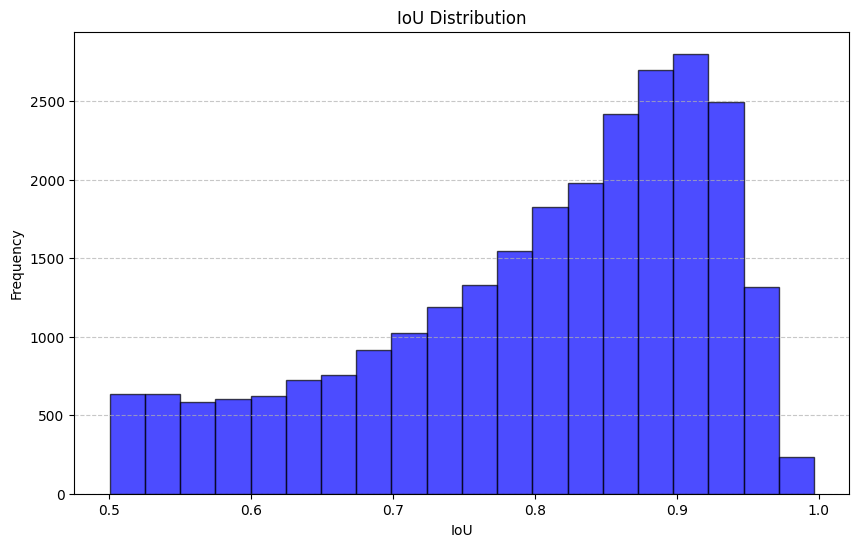

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
import json
import os
from PIL import Image
from torchvision.ops import box_iou
import matplotlib.pyplot as plt

# Load the pre-trained Faster R-CNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
)
model.eval()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the image transformation
transform = T.ToTensor()

# Path to val2017 images and annotations
image_folder = '/content/coco_val2017/val2017'  # Update this path if needed
annotation_path = '/content/coco_ann2017/annotations/instances_val2017.json'  # Update this path if needed

# Load COCO annotations
with open(annotation_path, 'r') as f:
    coco_annotations = json.load(f)

# Create a mapping of image_id to ground truth annotations
image_id_to_annotations = {}
for annotation in coco_annotations['annotations']:
    image_id = annotation['image_id']
    bbox = annotation['bbox']  # Ground truth bounding box in [x, y, width, height]
    category_id = annotation['category_id']  # Object class
    if image_id not in image_id_to_annotations:
        image_id_to_annotations[image_id] = []
    image_id_to_annotations[image_id].append({'bbox': bbox, 'category_id': category_id})

# Create a mapping of file names to image IDs
file_name_to_image_id = {img['file_name']: img['id'] for img in coco_annotations['images']}

# Initialize metrics
true_positives = 0
false_positives = 0
false_negatives = 0
iou_threshold = 0.5  # Adjust this IoU threshold if needed

# Initialize a list to store IoU values
iou_values = []

# Iterate over images in val2017
for image_name in os.listdir(image_folder):
    if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Load and transform the image
        img_path = os.path.join(image_folder, image_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            pred = model(img_tensor)

        # Extract predictions
        pred_boxes = pred[0]['boxes'].cpu()  # [x1, y1, x2, y2]
        pred_labels = pred[0]['labels'].cpu()
        pred_scores = pred[0]['scores'].cpu()

        # Get the ground truth annotations for this image
        image_id = file_name_to_image_id[image_name]
        ground_truths = image_id_to_annotations.get(image_id, [])

        # Convert ground truth bounding boxes from [x, y, width, height] to [x1, y1, x2, y2]
        ground_truth_boxes = []
        for gt in ground_truths:
            x, y, w, h = gt['bbox']
            x1, y1, x2, y2 = x, y, x + w, y + h
            ground_truth_boxes.append([x1, y1, x2, y2])
        ground_truth_boxes = torch.tensor(ground_truth_boxes, dtype=torch.float32)

        # Skip IoU calculation if there are no ground truth boxes
        if ground_truth_boxes.size(0) == 0:
            false_positives += len(pred_boxes)  # All predictions are false positives
            continue

        # Match predictions to ground truths
        gt_matched = [False] * len(ground_truth_boxes)  # Track matched ground truths
        for i, pred_box in enumerate(pred_boxes):
            if pred_scores[i] > 0.5:  # Confidence threshold
                pred_tensor = pred_box.unsqueeze(0)  # Convert to 2D tensor for box_iou
                ious = box_iou(pred_tensor, ground_truth_boxes)  # Calculate IoUs
                max_iou, max_iou_idx = torch.max(ious, dim=1)  # Get the best match
                if max_iou.item() >= iou_threshold:  # If IoU >= threshold, it's a match
                    iou_values.append(max_iou.item())  # Store IoU value for visualization
                    if not gt_matched[max_iou_idx.item()]:  # True Positive if not matched before
                        true_positives += 1
                        gt_matched[max_iou_idx.item()] = True
                    else:
                        false_positives += 1  # Duplicate match
                else:
                    false_positives += 1  # IoU < threshold

        # Count remaining unmatched ground truths as False Negatives
        false_negatives += gt_matched.count(False)

# Calculate metrics
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print results
print("Evaluation Results:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"True Positives: {true_positives}, False Positives: {false_positives}, False Negatives: {false_negatives}")

# Plot the IoU distribution as a histogram
plt.figure(figsize=(10, 6))
plt.hist(iou_values, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("IoU Distribution")
plt.xlabel("IoU")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
